In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import pickle
from trainer import LocalTrainer
from layers import *
from transformers import T5ForConditionalGeneration, AutoTokenizer
from datasets import load_dataset
import json
def preprocess_function_sst2(sample):
   example = {}
   example['text'] = f"sst2 sentence: {sample['sentence']} label:"
   return example

In [47]:
with open('scores_magnitude.pkl', 'rb') as f:
    scores = pickle.load(f)

In [48]:
scores_flat = [score[i] for score in scores for i in range(len(score))]

In [60]:
active_ranks = []
thresh = np.sort(scores_flat)[int(len(scores_flat)*0.66)]
for i in range(len(scores)):
    active_ranks.append(np.array(scores[i]>thresh).sum())

In [ ]:
plt.plot(active_ranks)

In [25]:
np.sort(scores_flat)[len(scores_flat)//2]

0.007198356557637453

In [ ]:
for i in range(6):
    plt.plot(accs[i],label=f'i')
    plt.show()

In [6]:
with open('/home/ec2-user/llm_rank/data_aware/models/sst2_0.80_Attention.q,Attention.k,Attention.v,Attention.o,DenseReluDense.wi,DenseReluDense.wo_eigen_regress-weights=0.1_learning_rate=1e-06/checkpoint-101088/trainer_state.json', 'r') as file:
    data1 = json.load(file)
with open('/home/ec2-user/llm_rank/data_aware/models/boolq_0.80_Attention.q,Attention.k,Attention.v,Attention.o,DenseReluDense.wi,DenseReluDense.wo_eigen_regress-weights=0.1_learning_rate=1e-06/checkpoint-90783/trainer_state.json', 'r') as file:
    data2 = json.load(file)

In [7]:
def get_stat(data):
    losses = []
    accs = []
    for i in range(len(data['log_history'])):
        if 'eval_acc' in data['log_history'][i]:
            accs.append(data['log_history'][i]['eval_acc'])
        else:
            losses.append(data['log_history'][i]['loss'])
    return losses, accs

losses1, acc1 = get_stat(data1)
losses2, acc2 = get_stat(data2)

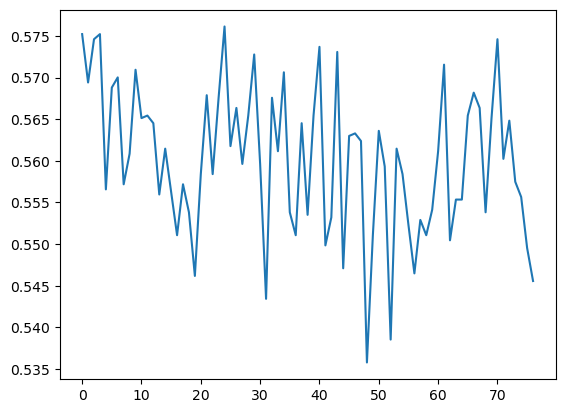

In [8]:
# plt.plot(list(range(len(data['log_history']))), [np.log10(data['log_history'][i]['loss']) for i in range(len(data['log_history']))])
# plt.plot(list(range(len(losses2))), np.log10(losses2))
# plt.plot(list(range(len(acc1))), acc1)
plt.plot(list(range(len(acc2))), acc2)


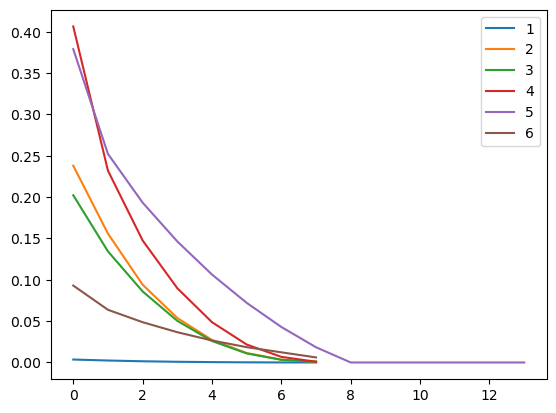

In [25]:
mses1 = [0.0035688369534909725, 0.002383740385994315, 0.0014577454421669245, 0.0008445598650723696, 0.00043468415969982743, 0.0001862151693785563, 5.67905735806562e-05, 1.5390862245112658e-05]
mses2 = [0.23794835805892944, 0.15584130585193634, 0.09405559301376343, 0.05377015098929405, 0.027202945202589035, 0.011412602849304676, 0.0033745081163942814, 0.000808310229331255]
mses3 = [0.20222875475883484, 0.13434825837612152, 0.0859043225646019, 0.05034021660685539, 0.025945954024791718, 0.010930361226201057, 0.0032456484623253345, 0.0009807772003114223]
mses4 = [0.40632200241088867, 0.2319653332233429, 0.14754819869995117, 0.08979599177837372, 0.04869786649942398, 0.02171255089342594, 0.00675448402762413, 0.0009168638498522341]
mses5 = [0.37890490889549255, 0.25218185782432556, 0.19327785074710846, 0.146357923746109, 0.1063355803489685, 0.07209175080060959, 0.04289107397198677, 0.018389413133263588, 2.152528168153367e-06, 2.1525565898627974e-06, 2.1525838747038506e-06, 2.152601609850535e-06, 2.1526152522710618e-06, 2.1526252567127813e-06,]
mses6 = [0.09302988648414612, 0.06370614469051361, 0.04870296269655228, 0.03660111129283905, 0.02658742107450962, 0.01850082539021969, 0.012281348928809166, 0.006113055627793074]
# mses7 = [0.003596619237214327, 0.0023661083541810513, 0.001483087777160108, 0.0008559152483940125, 0.0004412712005432695, 0.00018691633886191994, 5.607124694506638e-05, 7.006458872638177e-06]
plt.plot(mses1,label='1')
plt.plot(mses2,label='2')
plt.plot(mses3,label='3')
plt.plot(mses4,label='4')
plt.plot(mses5,label='5')
plt.plot(mses6,label='6')
plt.legend()